# Image Classifier

## Download data set

In [1]:
!cd data/
!wget http://www.vision.caltech.edu/Image_Datasets/Caltech256/256_ObjectCategories.tar

--2019-04-27 08:55:23--  http://www.vision.caltech.edu/Image_Datasets/Caltech256/256_ObjectCategories.tar
Resolving www.vision.caltech.edu... 34.208.54.77
Connecting to www.vision.caltech.edu|34.208.54.77|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1183006720 (1.1G) [application/x-tar]
Saving to: ‘256_ObjectCategories.tar’

256_ObjectCategorie 100%[===================>]   1.10G  2.30MB/s    in 8m 16s  

2019-04-27 09:03:39 (2.28 MB/s) - ‘256_ObjectCategories.tar’ saved [1183006720/1183006720]



In [2]:
!tar -xf 256_ObjectCategories.tar

The following are executed on bash shell on Ubuntu.

Run the following commands to download the dataset

cd data/<br>
wget http://www.vision.caltech.edu/Image_Datasets/Caltech256/256_ObjectCategories.tar<br>
tar -xf 256_ObjectCategories.tar<br>
ls 256_ObjectCategories.tar<br>
ls -F 256_ObjectCategories | head -5<br>
&emsp; 001.ak47/
&emsp    002.american-flag/<br>
    003.backpack/<br>
    004.baseball-bat/<br>
    005.baseball-glove/<br>

## View data

In [1]:
from fastai import *
from fastai.vision import *

In [2]:
path = Path('data/256_ObjectCategories')
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [3]:
data.batch_size

64

In [5]:
data.classes

['001.ak47',
 '002.american-flag',
 '003.backpack',
 '004.baseball-bat',
 '005.baseball-glove',
 '006.basketball-hoop',
 '007.bat',
 '008.bathtub',
 '009.bear',
 '010.beer-mug',
 '011.billiards',
 '012.binoculars',
 '013.birdbath',
 '014.blimp',
 '015.bonsai-101',
 '016.boom-box',
 '017.bowling-ball',
 '018.bowling-pin',
 '019.boxing-glove',
 '020.brain-101',
 '021.breadmaker',
 '022.buddha-101',
 '023.bulldozer',
 '024.butterfly',
 '025.cactus',
 '026.cake',
 '027.calculator',
 '028.camel',
 '029.cannon',
 '030.canoe',
 '031.car-tire',
 '032.cartman',
 '033.cd',
 '034.centipede',
 '035.cereal-box',
 '036.chandelier-101',
 '037.chess-board',
 '038.chimp',
 '039.chopsticks',
 '040.cockroach',
 '041.coffee-mug',
 '042.coffin',
 '043.coin',
 '044.comet',
 '045.computer-keyboard',
 '046.computer-monitor',
 '047.computer-mouse',
 '048.conch',
 '049.cormorant',
 '050.covered-wagon',
 '051.cowboy-hat',
 '052.crab-101',
 '053.desk-globe',
 '054.diamond-ring',
 '055.dice',
 '056.dog',
 '057.dol

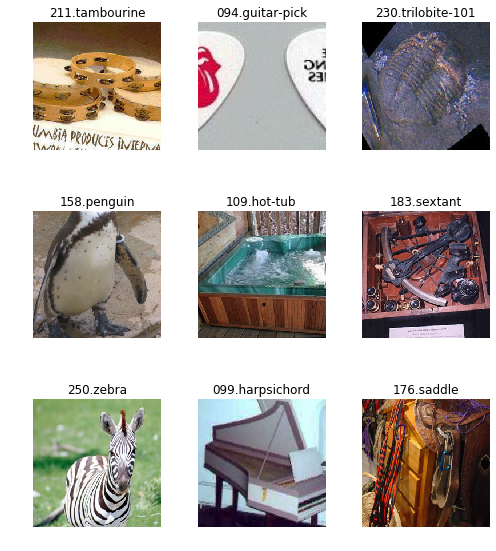

In [6]:
data.show_batch(rows=3, figsize=(7,8))

In [7]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['001.ak47',
  '002.american-flag',
  '003.backpack',
  '004.baseball-bat',
  '005.baseball-glove',
  '006.basketball-hoop',
  '007.bat',
  '008.bathtub',
  '009.bear',
  '010.beer-mug',
  '011.billiards',
  '012.binoculars',
  '013.birdbath',
  '014.blimp',
  '015.bonsai-101',
  '016.boom-box',
  '017.bowling-ball',
  '018.bowling-pin',
  '019.boxing-glove',
  '020.brain-101',
  '021.breadmaker',
  '022.buddha-101',
  '023.bulldozer',
  '024.butterfly',
  '025.cactus',
  '026.cake',
  '027.calculator',
  '028.camel',
  '029.cannon',
  '030.canoe',
  '031.car-tire',
  '032.cartman',
  '033.cd',
  '034.centipede',
  '035.cereal-box',
  '036.chandelier-101',
  '037.chess-board',
  '038.chimp',
  '039.chopsticks',
  '040.cockroach',
  '041.coffee-mug',
  '042.coffin',
  '043.coin',
  '044.comet',
  '045.computer-keyboard',
  '046.computer-monitor',
  '047.computer-mouse',
  '048.conch',
  '049.cormorant',
  '050.covered-wagon',
  '051.cowboy-hat',
  '052.crab-101',
  '053.desk-globe',
  

## Train model

In [8]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [9]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate
1,2.505142,1.501036,0.301421
2,1.130297,0.827327,0.214507
3,0.971427,0.753872,0.191309
4,0.871758,0.709289,0.180199
5,0.732926,0.658123,0.166313
6,0.617141,0.628751,0.158798
7,0.509792,0.617695,0.152263
8,0.458200,0.611451,0.150139


In [10]:
learn.save('stage-1.v5')

In [11]:
learn.unfreeze()

In [12]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


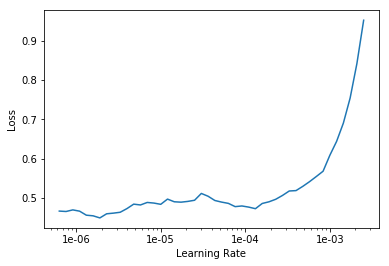

In [13]:
learn.recorder.plot()

In [14]:
learn.fit_one_cycle(4, max_lr=slice(2e-6,2e-7))

epoch,train_loss,valid_loss,error_rate
1,0.448835,0.609926,0.149322
2,0.452578,0.606800,0.151936
3,0.453701,0.608140,0.151119
4,0.465107,0.608072,0.150466


In [15]:
learn.save('stage-2.v5')

## Interpretation

In [16]:
interp = ClassificationInterpretation.from_learner(learn)

In [18]:
interp.most_confused(min_val=2)

[('146.mountain-bike', '224.touring-bike', 7),
 ('004.baseball-bat', '039.chopsticks', 6),
 ('191.sneaker', '255.tennis-shoes', 6),
 ('082.galaxy', '044.comet', 5),
 ('091.grand-piano-101', '099.harpsichord', 5),
 ('038.chimp', '090.gorilla', 4),
 ('060.duck', '089.goose', 4),
 ('109.hot-tub', '008.bathtub', 4),
 ('215.telephone-box', '083.gas-pump', 4),
 ('249.yo-yo', '079.frisbee', 4),
 ('257.clutter', '138.mattress', 4),
 ('021.breadmaker', '156.paper-shredder', 3),
 ('030.canoe', '096.hammock', 3),
 ('042.coffin', '138.mattress', 3),
 ('069.fighter-jet', '251.airplanes-101', 3),
 ('106.horseshoe-crab', '048.conch', 3),
 ('122.kayak', '030.canoe', 3),
 ('147.mushroom', '148.mussels', 3),
 ('156.paper-shredder', '128.lathe', 3),
 ('159.people', '253.faces-easy-101', 3),
 ('171.refrigerator', '142.microwave', 3),
 ('195.soda-can', '249.yo-yo', 3),
 ('229.tricycle', '181.segway', 3),
 ('255.tennis-shoes', '191.sneaker', 3)]